In [2]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps, ImageShow, ImageFilter
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

In [ ]:
font = {
        'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 28,
        }

: 

In [22]:
#Zadanie 1

img = Image.open('obraz.jpg')
print(f'Tryb obrazu po wczytaniu: {img.mode}')
img = img.convert('L')
print(f'Tryb obrazu po konwersji: {img.mode}\n')
img.save('obraz_l.jpg')
img_copy = img.copy()

Tryb obrazu po wczytaniu: RGB
Tryb obrazu po konwersji: L



extrema  [(0, 255)]
count  [570000]
mean  [132.41293684210527]
median  [139]
stddev  [50.99835555318764]


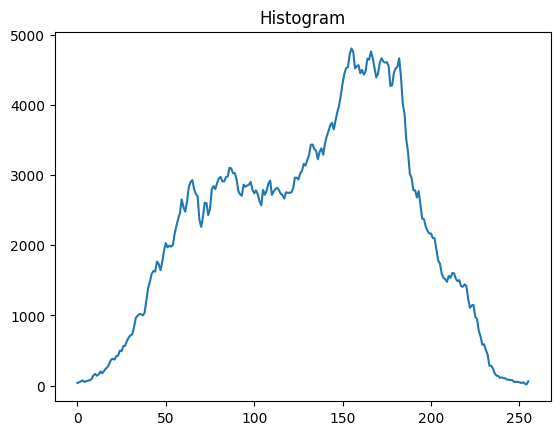

In [46]:
#Zadanie 2

def statystyki(im):
    s = stat.Stat(im)
    print("extrema ", s.extrema)  # max i min
    print("count ", s.count)  # zlicza
    print("mean ", s.mean)  # srednia
    print("median ", s.median)  # mediana
    print("stddev ", s.stddev)  # odchylenie standardowe

statystyki(img_copy)

img_hist = img_copy.histogram()
plt.title('Histogram')
plt.plot(img_hist)
plt.show()

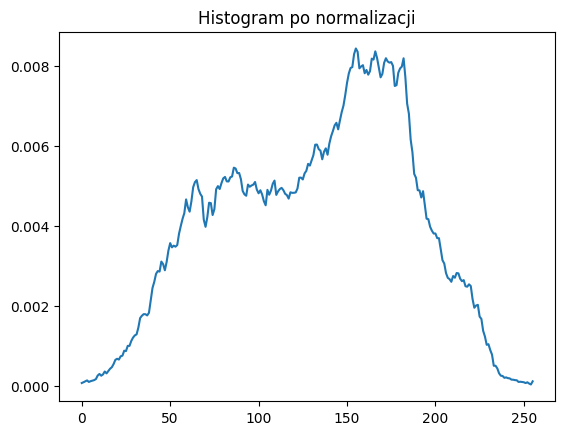

In [26]:
#Zadanie 3

def histogram_norm(obraz):
    w, h = obraz.size
    size = w * h
    hist = obraz.histogram()
    hist_norm = hist.copy()
    for i in range(len(hist)):
        hist_norm[i] = hist[i] / size
    return hist_norm

# print(histogram_norm(img_copy))
plt.title('Histogram po normalizacji')
plt.plot(histogram_norm(img_copy))
plt.show()

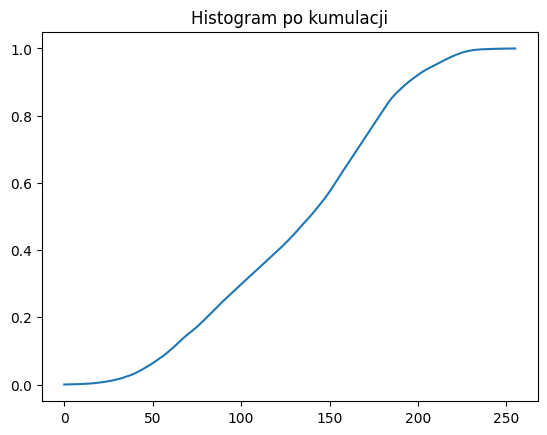

In [48]:
def histogram_kumul(obraz):
    hist = histogram_norm(obraz)
    hist_cum = [None for i in range(len(hist))]
    hist_cum[0]=hist[0]
    for i in range(1, len(hist)):
        hist_cum[i] = hist_cum[i-1] + hist[i]
    return hist_cum

plt.title('Histogram po kumulacji')
plt.plot(histogram_kumul(img_copy))
plt.show()

In [70]:
#Zadanie 5

def histogram_equalization(obraz):
    hist_kumul = histogram_kumul(obraz)
    img_eq = obraz.point(lambda i: int(255*hist_kumul[i]))
    return img_eq

img_eq = histogram_equalization(img_copy)
img_eq.save('equalized.png')
img_eq.show()

In [33]:
#Zadanie 6

img_eq1 = ImageOps.equalize(img_copy, mask=None)
img_eq1.save('equalized1.jpg')
img_eq1.show()

In [54]:
#Zadane 6.1

img_eq_diff = ImageChops.difference(img_eq, img_eq1)
img_eq_diff.show()
print('Statystyki img_eq_diff:')
statystyki(img_eq_diff)

Statystyki img_eq_diff:
extrema  [(0, 2)]
count  [570000]
mean  [0.9159684210526315]
median  [1]
stddev  [0.652986466413018]


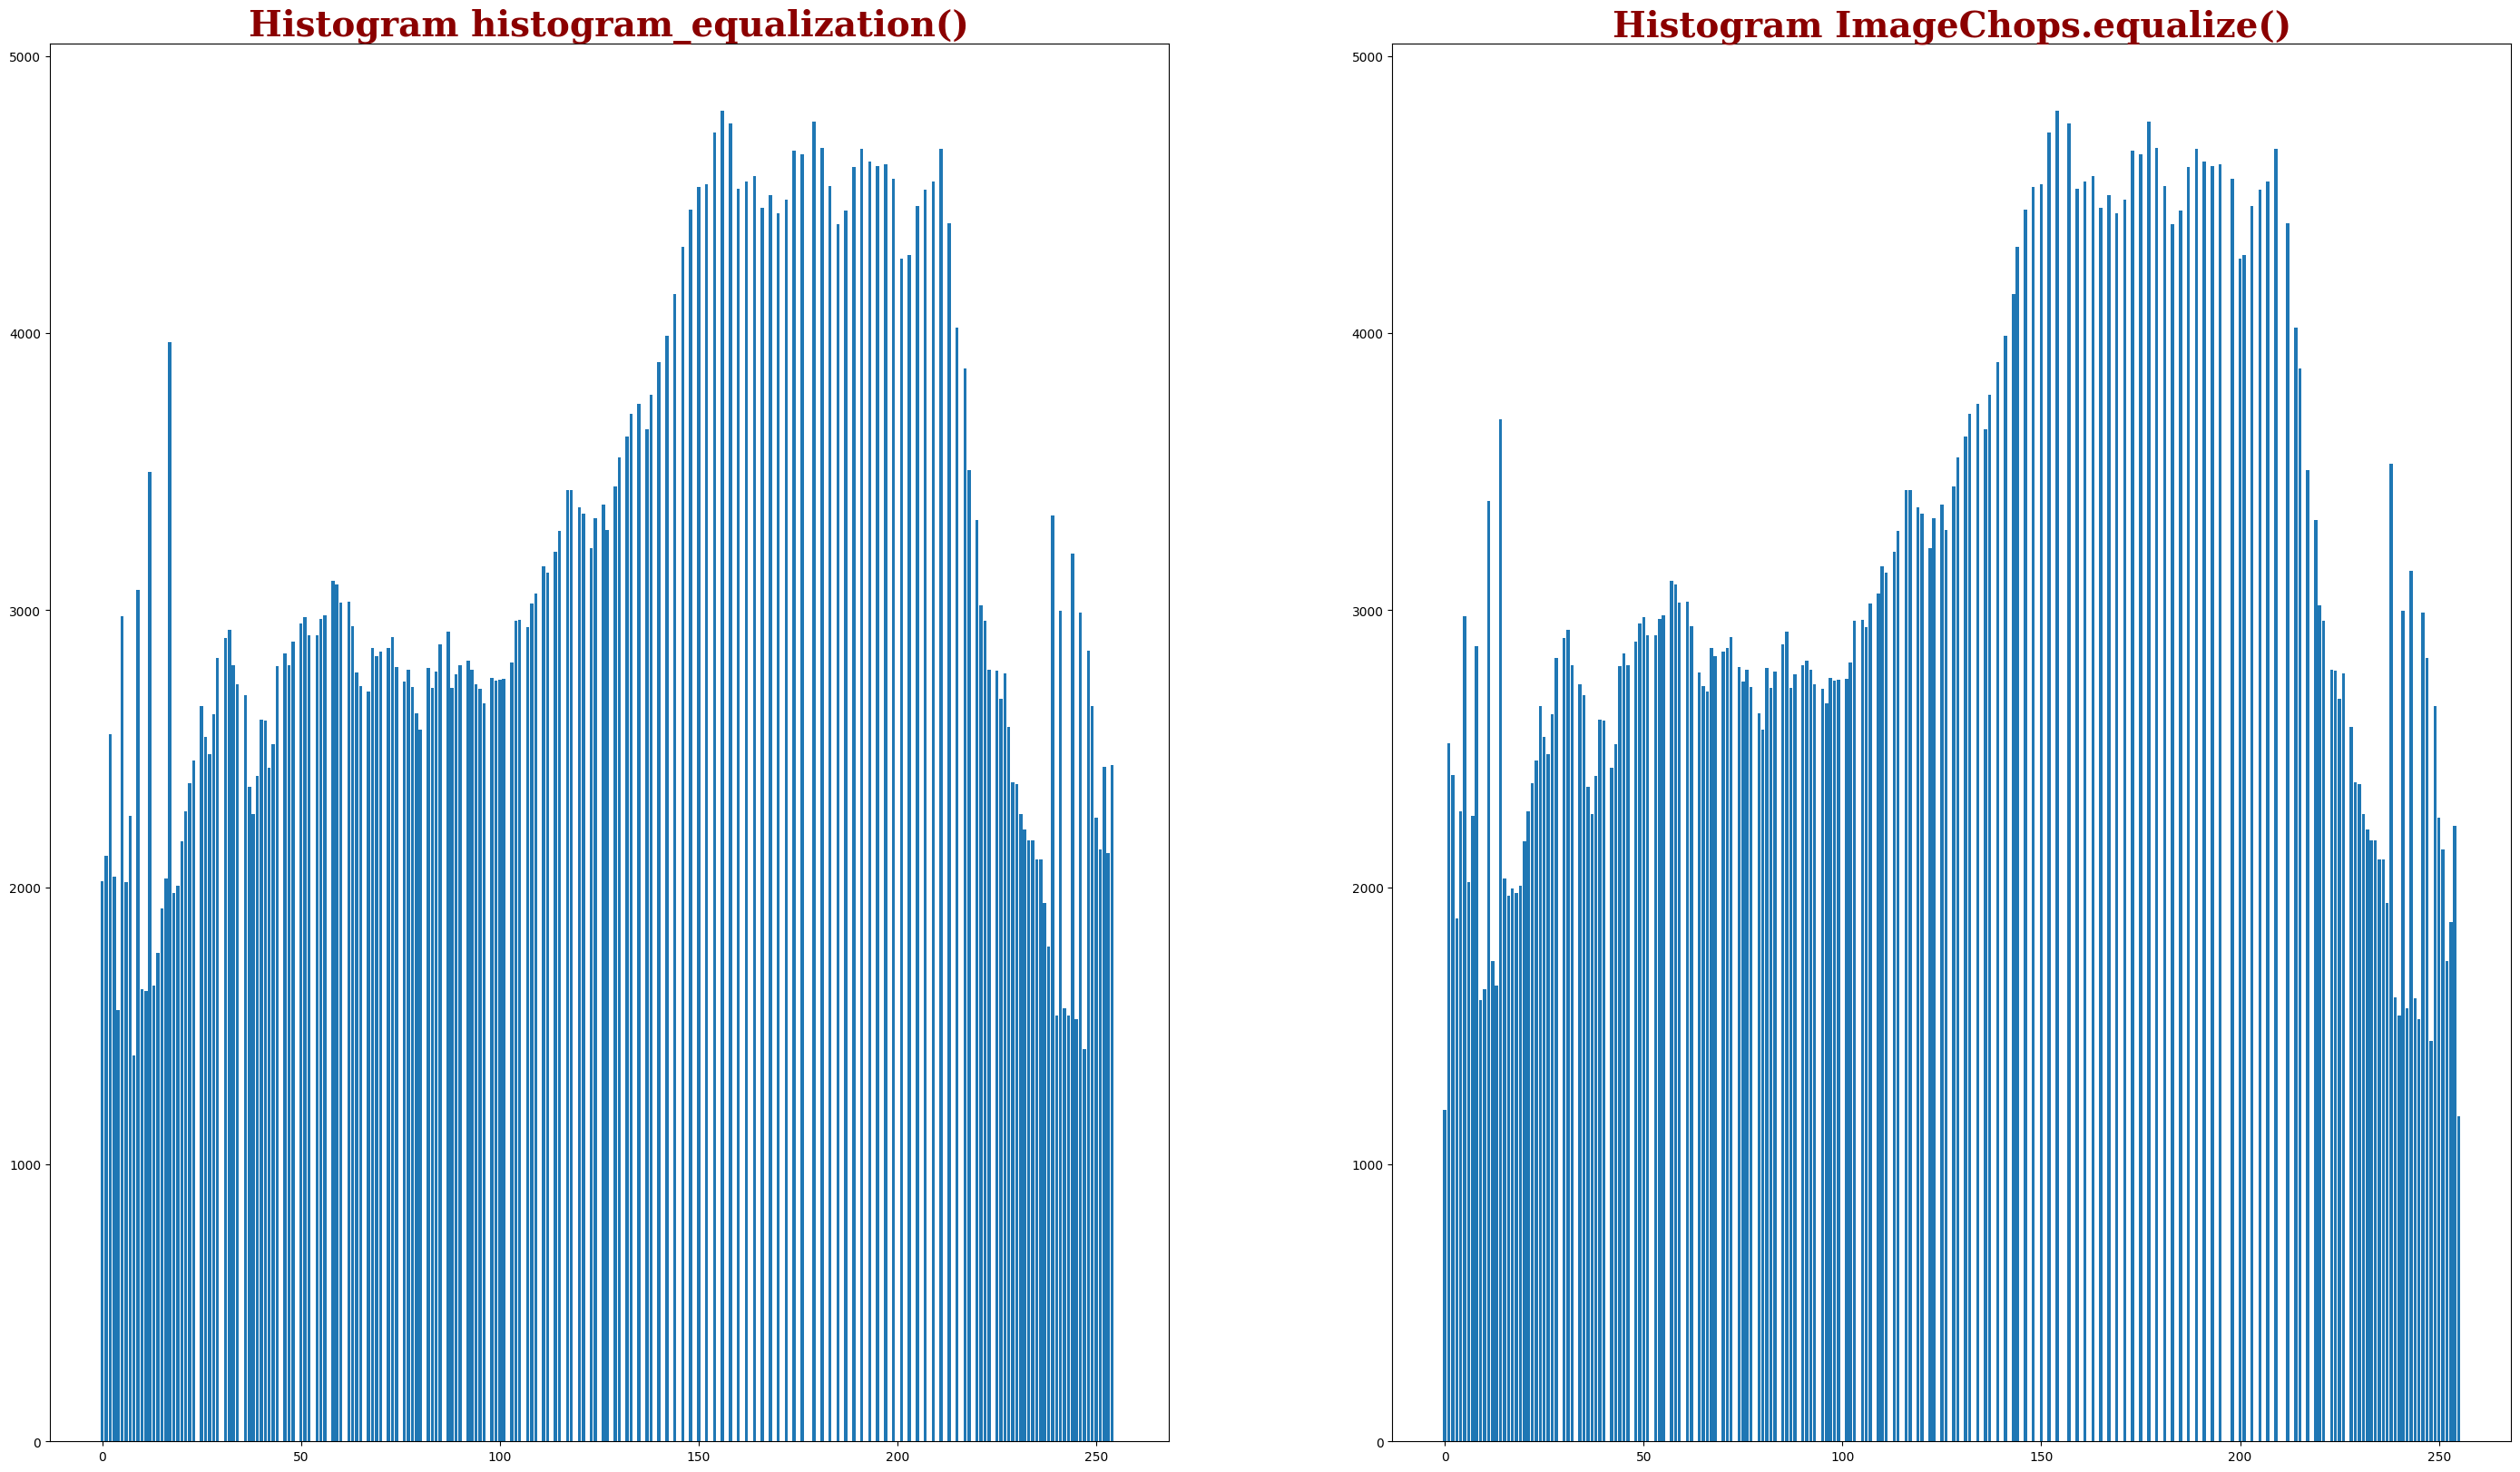

In [69]:
#Zadanie 6.2

plt.figure(figsize=(35, 20))
plt.subplot(1, 2, 1)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.bar(np.arange(0,256,1) ,histogram_equalization(img_copy).histogram())
plt.title('Histogram histogram_equalization()', fontdict=font)
plt.subplot(1, 2, 2)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.bar(np.arange(0,256,1), ImageOps.equalize(img_copy).histogram())
plt.title('Histogram ImageChops.equalize()', fontdict=font)
plt.savefig('histogramy.png')
plt.show()

In [42]:
#Zadanie 6.3
print('Statystyki img_eq: ')
statystyki(img_eq)
print('')
print('Statystyki img_eq1: ')
statystyki(img_eq1)

Statystyki img_eq: 
extrema  [(0, 254)]
count  [570000]
mean  [127.698]
median  [127]
stddev  [73.66934392674126]

Statystyki img_eq1: 
extrema  [(0, 255)]
count  [570000]
mean  [126.80080701754386]
median  [126]
stddev  [73.5136632440477]


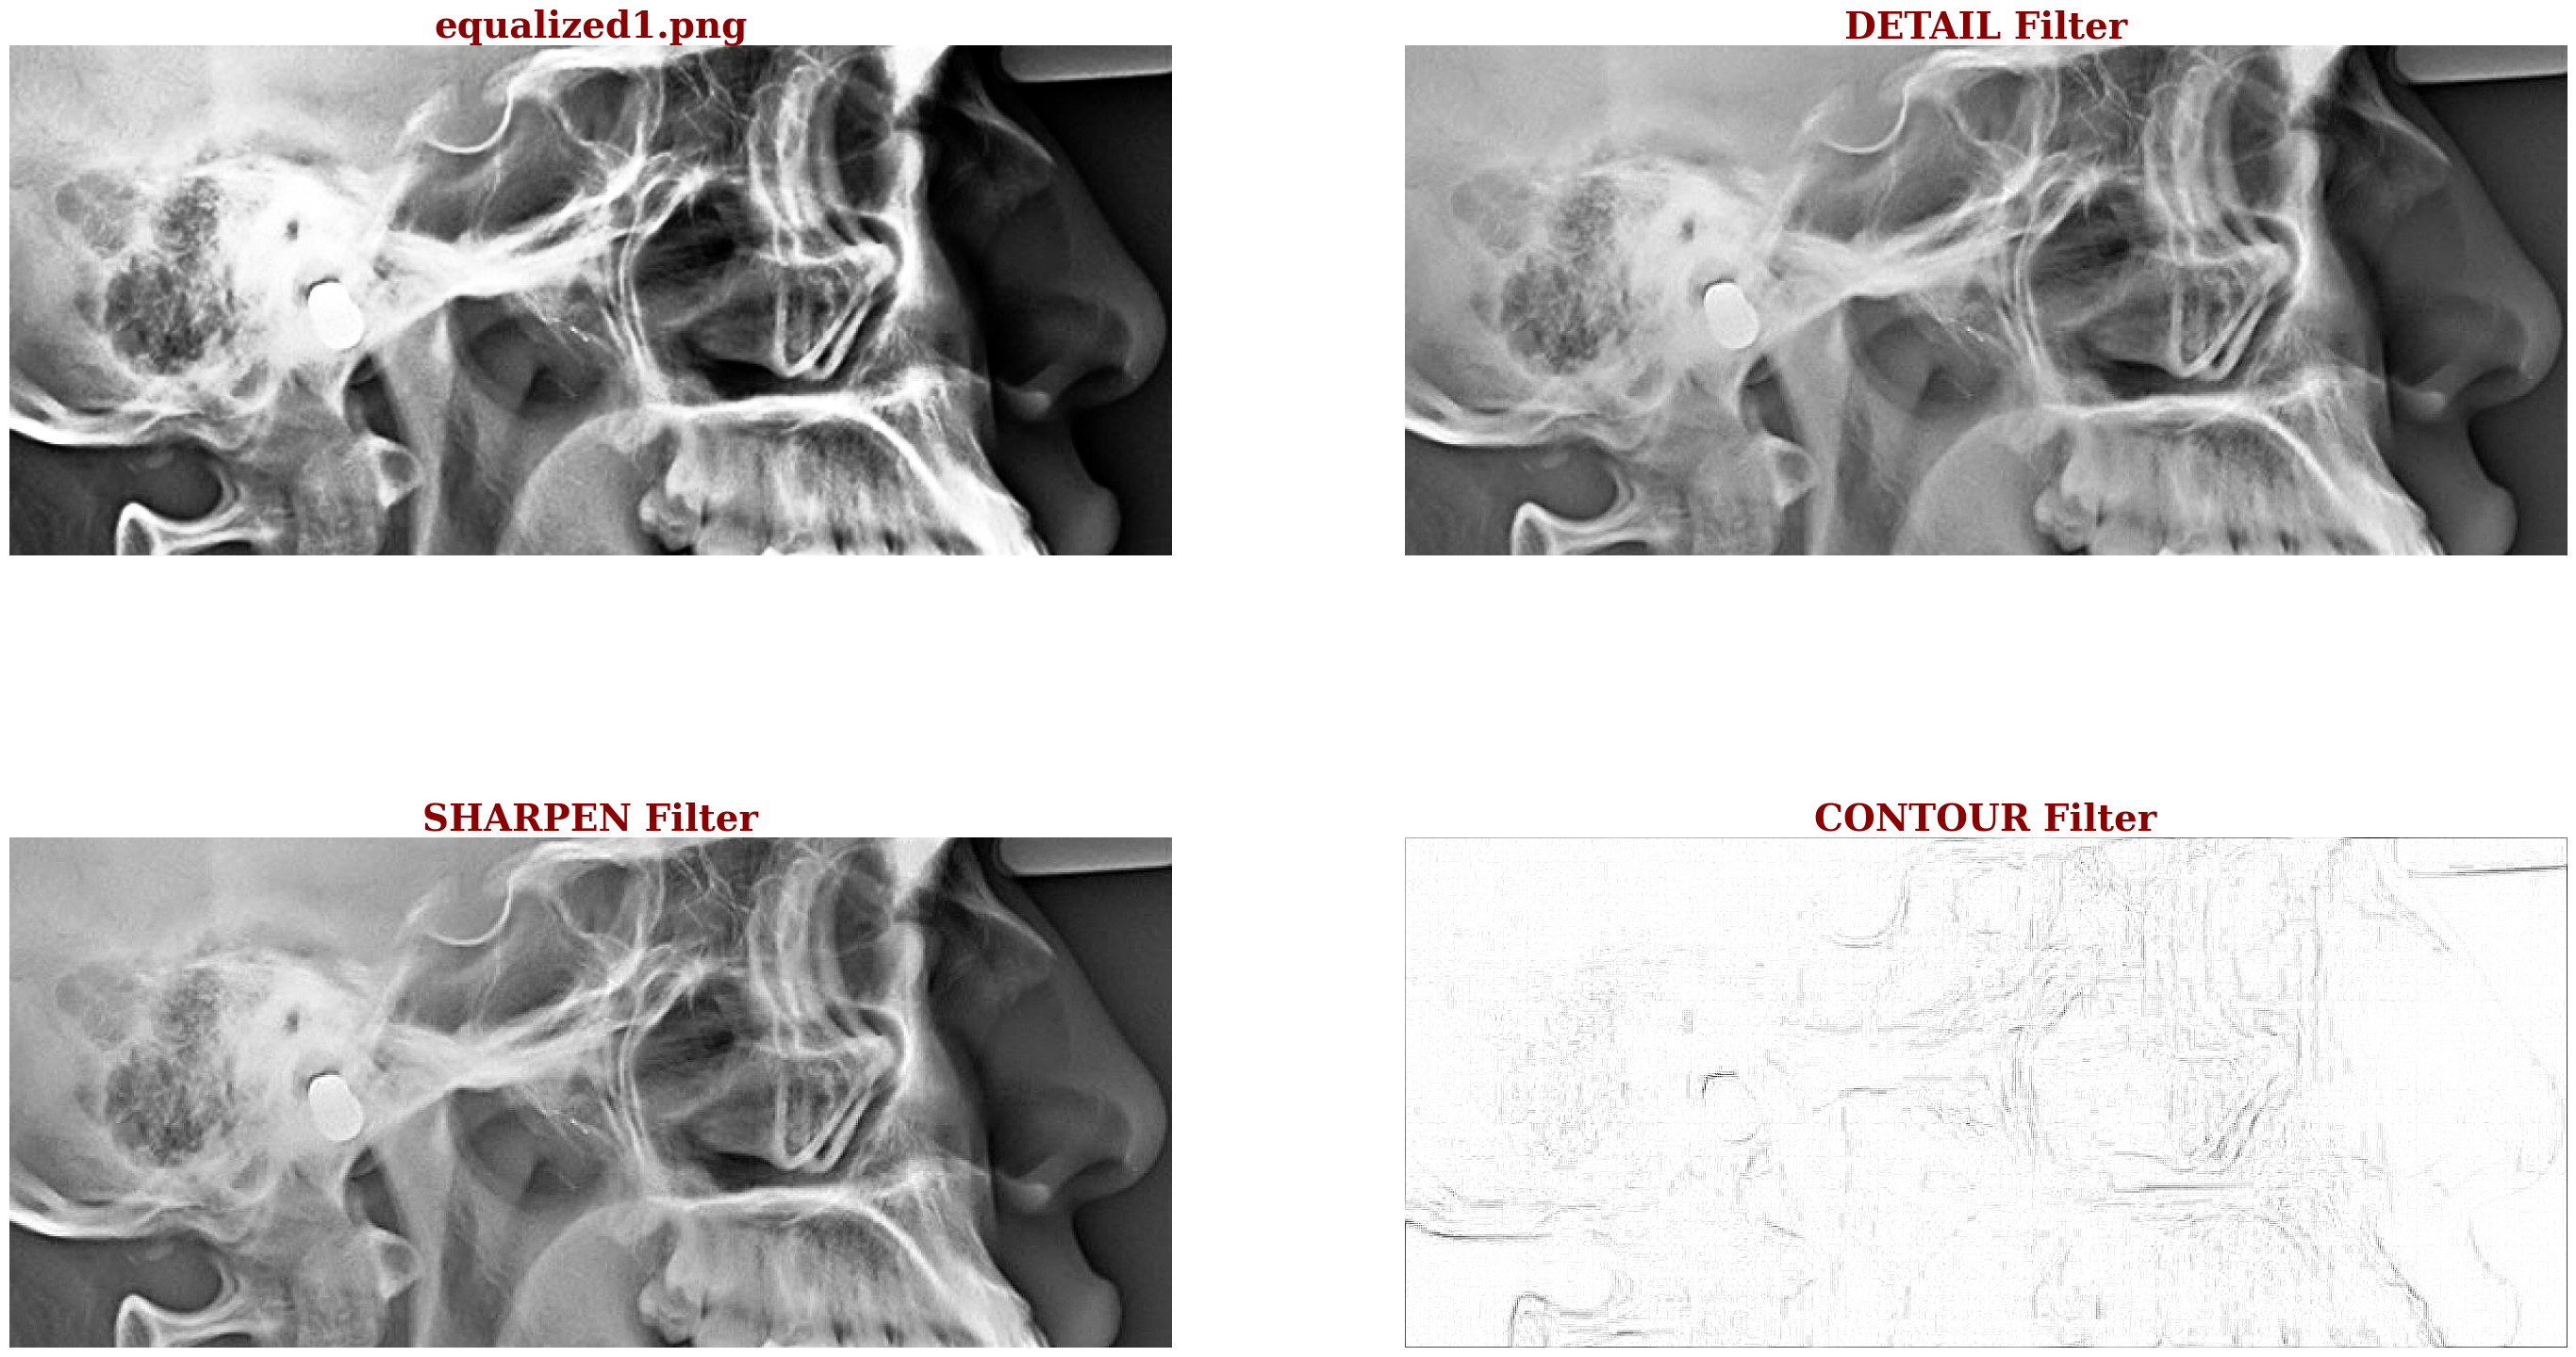

In [21]:
#Zadanie 7

img_DETAIL = img_copy.filter(ImageFilter.DETAIL)
img_SHARPEN = img_copy.filter(ImageFilter.SHARPEN)
img_CONTOUR = img_copy.filter(ImageFilter.CONTOUR)

plt.figure(figsize=(35, 20))
plt.subplot(2, 2, 1)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(img_eq, 'gray')
plt.axis('off')
plt.title('equalized1.png', fontdict=font)
plt.subplot(2, 2, 2)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(img_DETAIL, 'gray')
plt.axis('off')
plt.title('DETAIL Filter', fontdict=font)
plt.subplot(2, 2, 3)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(img_SHARPEN, 'gray')
plt.axis('off')
plt.title('SHARPEN Filter', fontdict=font)
plt.subplot(2, 2, 4)  # ile obrazów w pionie, ile w poziomie, numer obrazu
plt.imshow(img_CONTOUR, 'gray')
plt.axis('off')
plt.title('CONTOUR Filter', fontdict=font)
plt.savefig('filtry.png')
plt.show()